# FTSE 100 stocks data collection and Exploratory Data Analysis

## 1. Introduction

Historical stock market data from Yahoo! Finance will be collected, analysed, transformed and visualised to gain insights into the stock returns for a selection of FTSE 100 companies from 2010-2019, as well as looking at the FTSE 100 Index itself.

## 2. Install/import libraries

In [ ]:
!pip install yfinance as yfinance
!pip install mplfinance

In [1]:
import yfinance as yf

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.patches as mpatches
from matplotlib.dates import date2num, DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from mplfinance.original_flavor import candlestick_ohlc
import seaborn as sns

import datetime
from datetime import date, timedelta

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

## 3. Data collection

Download FTSE 100 stock data from Yahoo! Finance using yfinance library and store in a pandas dataframe. The stocks chosen are ULVR.L (Unilever), RSDB.L (Royal Dutch Shell), GSK.L (GlaxoSmithKline), AZN.L (AstraZeneca), HSBA.L (HSBC) and BP.L (BP) representing a selection of different industries - pharmaceuticals, oil and finance.

In [16]:
ftse100_stocks = yf.download("AZN.L GSK.L ULVR.L BP.L HSBA.L", start=datetime.datetime(2013, 1, 1), 
                                     end=datetime.datetime(2023, 10, 10), group_by='tickers')
ftse100_stocks.head(10)

[*********************100%%**********************]  5 of 5 completed


HSBA.L                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2013-10-10  672.500000  682.616028  670.900024  678.299988  386.881500   
2013-10-11  681.200012  692.900024  679.400024  689.599976  393.326813   
2013-10-14  687.099976  690.695007  683.400024  689.799988  393.440796   
2013-10-15  690.200012  696.000000  685.099976  687.400024  392.071991   
2013-10-16  684.400024  688.099976  679.700012  685.799988  391.159271   
2013-10-17  682.500000  682.500000  672.400024  678.000000  386.710449   
2013-10-18  677.299988  679.799988  675.099976  679.000000  387.280914   
2013-10-21  679.599976  687.900024  677.700012  685.700012  391.102386   
2013-10-22  684.599976  690.500000  683.400024  687.700012  392.243011   
2013-10-23  677.500000  681.169983  675.000000  678.299988  390.345093   

                       AZN.L                                    ...  \
              Volume    Open         High          Low   Close  ...   
Date                                                            ...   
2013-10-10  20583150  3119.0  3148.120117  3107.500000  3133.0  ...   
2013-10-11  17662736  3148.5  3183.000000  3127.500000  3176.5  ...   
2013-10-14  10192419  3177.0  3186.500000  3156.000000  3186.5  ...   
2013-10-15  30723079  3181.0  3218.850098  3173.000000  3183.0  ...   
2013-10-16  31288466  3167.5  3168.500000  3131.913086  3159.5  ...   
2013-10-17  21446484  3145.0  3183.250000  3145.000000  3150.0  ...   
2013-10-18  26254532  3156.5  3179.000000  3144.177002  3149.5  ...   
2013-10-21  20014004  3155.0  3179.000000  3154.000000  3175.0  ...   
2013-10-22  18045992  3166.5  3198.500000  3163.000000  3187.5  ...   
2013-10-23  20132715  3191.5  3213.500000  3182.500000  3210.0  ...   

                  BP.L                                      ULVR.L  \
                   Low       Close   Adj Close      Volume    Open   
Date                                                                 
2013-10-10  432.899994  437.299988  239.347183  19186578.0  2363.0   
2013-10-11  435.700012  439.649994  240.633331  12752114.0  2365.0   
2013-10-14  437.587006  443.399994  242.685852  15528278.0  2373.0   
2013-10-15  442.649994  444.649994  243.370010  17686481.0  2395.0   
2013-10-16  444.450012  445.750000  243.972107  32736884.0  2391.0   
2013-10-17  440.149994  443.899994  242.959503  19460276.0  2406.0   
2013-10-18  443.450012  447.450012  244.902512  24020674.0  2459.0   
2013-10-21  446.332001  449.549988  246.051971  13109476.0  2469.0   
2013-10-22  447.299988  448.000000  245.203583  20813507.0  2464.0   
2013-10-23  445.850006  449.250000  245.887680  14718553.0  2488.0   

                                                                    
                   High          Low   Close    Adj Close   Volume  
Date                                                                
2013-10-10  2363.000000  2328.388916  2353.0  1682.675415  2096629  
2013-10-11  2384.320068  2346.000000  2376.0  1699.123413  2383191  
2013-10-14  2390.824951  2372.000000  2383.0  1704.129639  1621018  
2013-10-15  2419.000000  2395.000000  2403.0  1718.432007  2581217  
2013-10-16  2409.635986  2374.000000  2399.0  1715.571045  2079009  
2013-10-17  2448.187012  2403.000000  2444.0  1747.752197  2464752  
2013-10-18  2472.000000  2454.718994  2466.0  1763.484741  2361521  
2013-10-21  2469.000000  2451.753906  2466.0  1763.484741  1376705  
2013-10-22  2502.444092  2457.312012  2484.0  1776.356323  1760409  
2013-10-23  2511.530029  2488.000000  2496.0  1784.937378  1810896  

[10 rows x 30 columns]

## 4. Exploratory Data Analysis

In [17]:
# Descriptive statistics showing distribution of the data

ftse100_stocks.describe()

HSBA.L                                                      \
              Open         High          Low        Close    Adj Close   
count  2525.000000  2525.000000  2525.000000  2525.000000  2525.000000   
mean    570.181141   575.204298   565.068478   570.163462   431.425949   
std     110.292765   110.193137   110.389718   110.151179    88.445756   
min     286.000000   286.850006   281.500000   283.350006   241.686859   
25%     485.500000   492.299988   479.600006   486.299988   359.302582   
50%     597.299988   601.599976   591.960022   596.799988   431.695404   
75%     650.200012   654.898010   645.700012   650.299988   501.126190   
max     796.000000   798.599976   790.500000   796.000000   643.919495   

                            AZN.L                                            \
             Volume          Open          High           Low         Close   
count  2.525000e+03   2525.000000   2525.000000   2525.000000   2525.000000   
mean   2.903899e+07   6561.903457   6638.583164   6494.532342   6563.768601   
std    1.549609e+07   2401.461165   2423.751850   2377.543880   2402.902240   
min    0.000000e+00   3119.000000   3148.120117   3107.500000   3133.000000   
25%    1.969188e+07   4518.500000   4573.680176   4469.500000   4512.000000   
50%    2.529128e+07   5753.000000   5813.000000   5695.000000   5741.000000   
75%    3.364220e+07   8401.000000   8493.000000   8309.000000   8399.000000   
max    1.769065e+08  12164.000000  12828.452148  12122.066406  12294.000000   

       ...         BP.L                                               ULVR.L  \
       ...          Low        Close    Adj Close        Volume         Open   
count  ...  2518.000000  2518.000000  2518.000000  2.518000e+03  2525.000000   
mean   ...   430.597212   435.602296   326.845158  4.168501e+07  3755.655162   
std    ...    86.741912    85.910693    81.653774  2.317374e+07   712.030161   
min    ...     4.686000   193.440002   164.800812  0.000000e+00  2310.000000   
25%    ...   362.266251   368.324989   262.950050  2.744390e+07  3107.500000   
50%    ...   452.074997   456.400009   310.837372  3.570196e+07  3993.000000   
75%    ...   491.033760   495.187508   397.246758  4.934337e+07  4263.000000   
max    ...   595.400024   598.299988   546.427246  2.574570e+08  5333.000000   

                                                                         
              High          Low        Close    Adj Close        Volume  
count  2525.000000  2525.000000  2525.000000  2525.000000  2.525000e+03  
mean   3787.078881  3724.959143  3756.303463  3224.258944  3.276415e+06  
std     718.197290   707.035446   712.391941   805.069490  3.219438e+06  
min    2333.600098  2291.649902  2306.000000  1679.906860  0.000000e+00  
25%    3135.310059  3082.000000  3109.000000  2433.367188  2.071895e+06  
50%    4023.500000  3961.000000  3995.500000  3496.015625  2.734790e+06  
75%    4294.000000  4232.000000  4264.500000  3875.807861  3.686494e+06  
max    5333.000000  5264.000000  5324.000000  4623.207031  1.300942e+08  

[8 rows x 30 columns]

In [18]:
# Concise summary of the dataframe to check for missing values and data types

ftse100_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2525 entries, 2013-10-10 to 2023-10-09
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (HSBA.L, Open)       2525 non-null   float64
 1   (HSBA.L, High)       2525 non-null   float64
 2   (HSBA.L, Low)        2525 non-null   float64
 3   (HSBA.L, Close)      2525 non-null   float64
 4   (HSBA.L, Adj Close)  2525 non-null   float64
 5   (HSBA.L, Volume)     2525 non-null   int64  
 6   (AZN.L, Open)        2525 non-null   float64
 7   (AZN.L, High)        2525 non-null   float64
 8   (AZN.L, Low)         2525 non-null   float64
 9   (AZN.L, Close)       2525 non-null   float64
 10  (AZN.L, Adj Close)   2525 non-null   float64
 11  (AZN.L, Volume)      2525 non-null   int64  
 12  (GSK.L, Open)        2524 non-null   float64
 13  (GSK.L, High)        2524 non-null   float64
 14  (GSK.L, Low)         2524 non-null   float64
 15  (GSK.L, Close)      

In [19]:
# Number of rows indicates number of trading days

ftse100_stocks.shape

(2525, 30)

We will use the Adjusted Close price to take into account all corporate actions, such as stock splits and dividends, to give a more accurate reflection of the true value of the stock and present a coherent picture of returns.

In [20]:
# Dataframe to contain Adjusted Close price for each company's stock

adj_close = pd.DataFrame()

In [21]:
tickers = ['AZN.L', 'GSK.L', 'ULVR.L', 'BP.L', 'HSBA.L']
for ticker in tickers:
    adj_close[ticker] = ftse100_stocks[ticker]['Adj Close']

adj_close

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
Date,,,,,
2013-10-10,2210.087402,839.976501,1682.675415,239.347183,386.881500
2013-10-11,2240.772949,844.868042,1699.123413,240.633331,393.326813
2013-10-14,2247.827148,852.476807,1704.129639,242.685852,393.440796
2013-10-15,2245.358154,856.009338,1718.432007,243.370010,392.071991
2013-10-16,2228.780762,856.009338,1715.571045,243.972107,391.159271
...,...,...,...,...,...
2023-10-03,10908.000000,1485.199951,4053.500000,507.941101,634.575928
2023-10-04,10892.000000,1486.800049,4012.500000,491.840240,629.953308
2023-10-05,10902.000000,1483.000000,4030.500000,491.446289,633.887451


Text(0, 0.5, 'Adjusted Close Price (pence)')

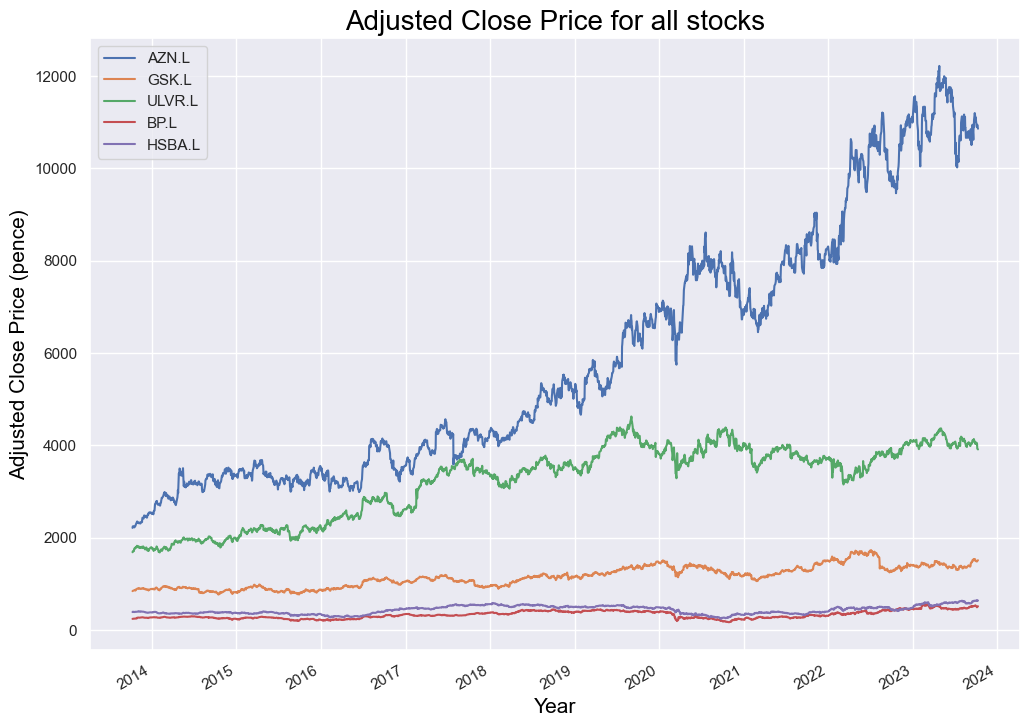

In [22]:
# Plot Adjusted Close price for all stocks

adj_close.plot(grid = True)
sns.set(rc={'figure.figsize':(12, 9)})
plt.title('Adjusted Close Price for all stocks', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Adjusted Close Price (pence)', color = 'black', fontsize = 15)

This chart shows the absolute price rather than relative change which we are more concerned with when trading. AZN.L and ULVR.L stocks are far more expensive than BP.L and HSBA.L making the latter appear much less volatile than they truly are. 

In [23]:
# lambda function to calculate min and max Adjusted Close price 

adj_close_min_max = adj_close.apply(lambda x: pd.Series([x.min(), x.max()], 
                              index=['min', 'max']))

adj_close_min_max

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
min,2210.087402,765.986694,1679.906860,164.800812,241.686859
max,12215.059570,1725.670776,4623.207031,546.427246,643.919495


One solution would be to use two different scales when plotting the data. One scale will be used by the BP.L and HSBA.L stocks, and the other by the more expensive stocks.

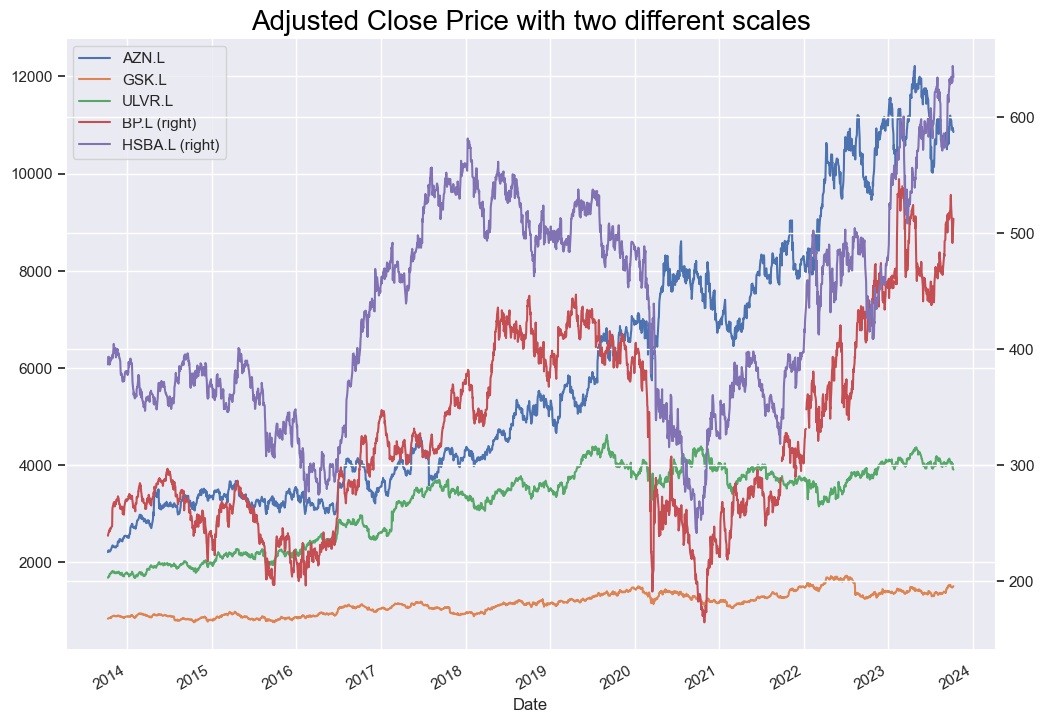

In [24]:
# Plot BP.L and HSBA.L data on a secondary y-axis

adj_close.plot(secondary_y = ["BP.L", "HSBA.L"], grid = True)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Adjusted Close Price with two different scales', color = 'black', fontsize = 20);

## 5. Data transformation

A better solution would be to plot the stocks' returns, which requires transforming the data into something more useful for our purposes.




### 5.1 Consider stocks' returns since beginning of the time period

One transformation is to plot $return_{t,0}$  = $\frac{price_t}{price_0}$ by applying a lambda function to each column in the adj_close dataframe and return a dataframe with the result.

In [26]:
# Transform data using lambda function to plot stocks' returns

returns_lambda = adj_close.apply(lambda x: x / x[0])
returns_lambda.head()

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
Date,,,,,
2013-10-10,1.000000,1.000000,1.000000,1.000000,1.000000
2013-10-11,1.013884,1.005823,1.009775,1.005374,1.016660
2013-10-14,1.017076,1.014882,1.012750,1.013949,1.016954
2013-10-15,1.015959,1.019087,1.021250,1.016807,1.013416
2013-10-16,1.008458,1.019087,1.019550,1.019323,1.011057


Plot $return_{t,0}$  = $\frac{price_t}{price_0}$ with transformed data

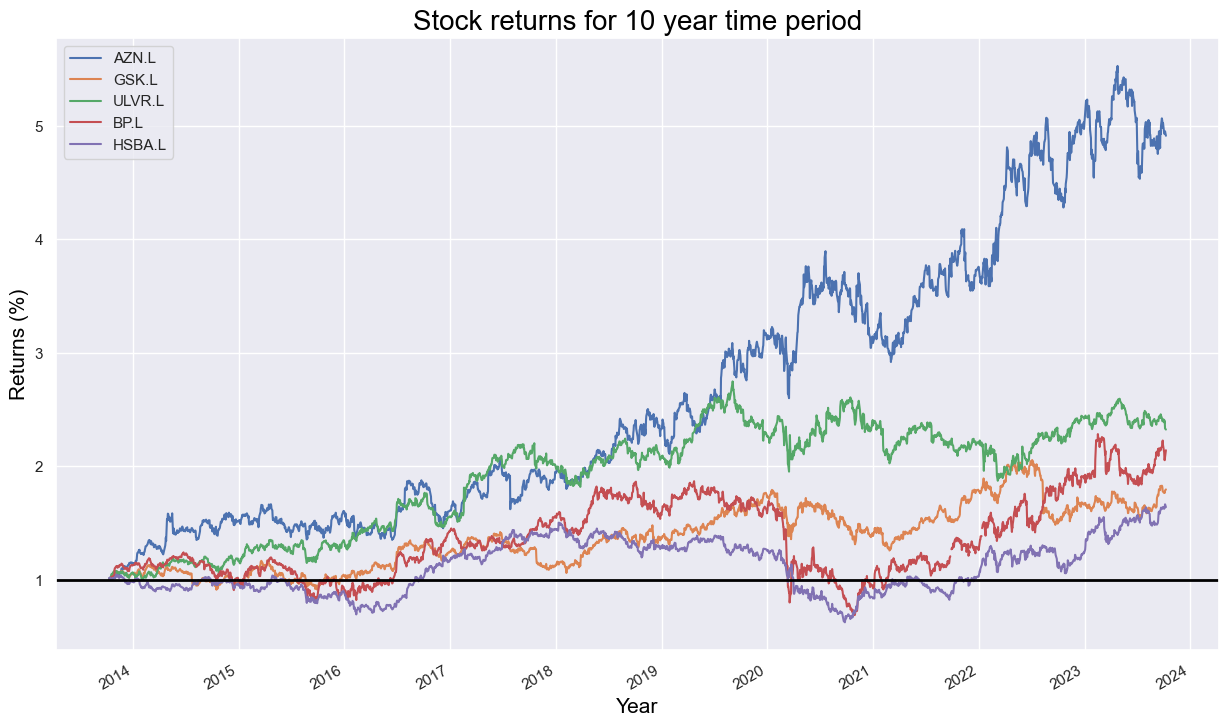

In [27]:
# Plot to show how profitable each stock was throughout the time period

returns_lambda.plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Stock returns for 10 year time period', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15);

This plot is more useful than the previous one as we can see how profitable each stock was since the beginning of the period and which are most closely correlated. The overall trend of the stocks is much more apparent.

In [28]:
# Create dataframe to contain returns for each company's stock to plot the change of each stock per day

returns = pd.DataFrame()

### 5.2 Percentage change

Another transformation is to calculate the daily percentage change directly using the pandas **'pct_change()'** method which computes the percentage change from the previous row by default.

This can be represented with the formula $increase_{t}$  = $\frac{price_t - price_{t-1}}{price_t}$ 





In [29]:
# pandas pct_change() method on the Adj Close column to create a column representing return value

tickers = ['AZN.L', 'GSK.L', 'ULVR.L', 'BP.L', 'HSBA.L']
for ticker in tickers:
    returns[ticker] = ftse100_stocks[ticker]['Adj Close'].pct_change() * 100

returns

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
Date,,,,,
2013-10-10,NaN,NaN,NaN,NaN,NaN
2013-10-11,1.388431,0.582343,0.977491,0.537357,1.665966
2013-10-14,0.314811,0.900586,0.294636,0.852966,0.028979
2013-10-15,-0.109839,0.414384,0.839277,0.281911,-0.347906
2013-10-16,-0.738296,0.000000,-0.166487,0.247400,-0.232794
...,...,...,...,...,...
2023-10-03,-0.383562,0.080859,0.720586,-0.635711,0.844016
2023-10-04,-0.146681,0.107736,-1.011472,-3.169828,-0.728458
2023-10-05,0.091811,-0.255586,0.448598,-0.080097,0.624513


In [30]:
# Clean up the data by dropping the first value which becomes a 'NaN' as there is no price change from the day before.

returns.dropna(inplace=True)
returns.head()

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
Date,,,,,
2013-10-11,1.388431,0.582343,0.977491,0.537357,1.665966
2013-10-14,0.314811,0.900586,0.294636,0.852966,0.028979
2013-10-15,-0.109839,0.414384,0.839277,0.281911,-0.347906
2013-10-16,-0.738296,0.000000,-0.166487,0.247400,-0.232794
2013-10-17,-0.300665,-0.063444,1.875827,-0.415049,-1.137343


Text(0, 0.5, 'Returns (%)')

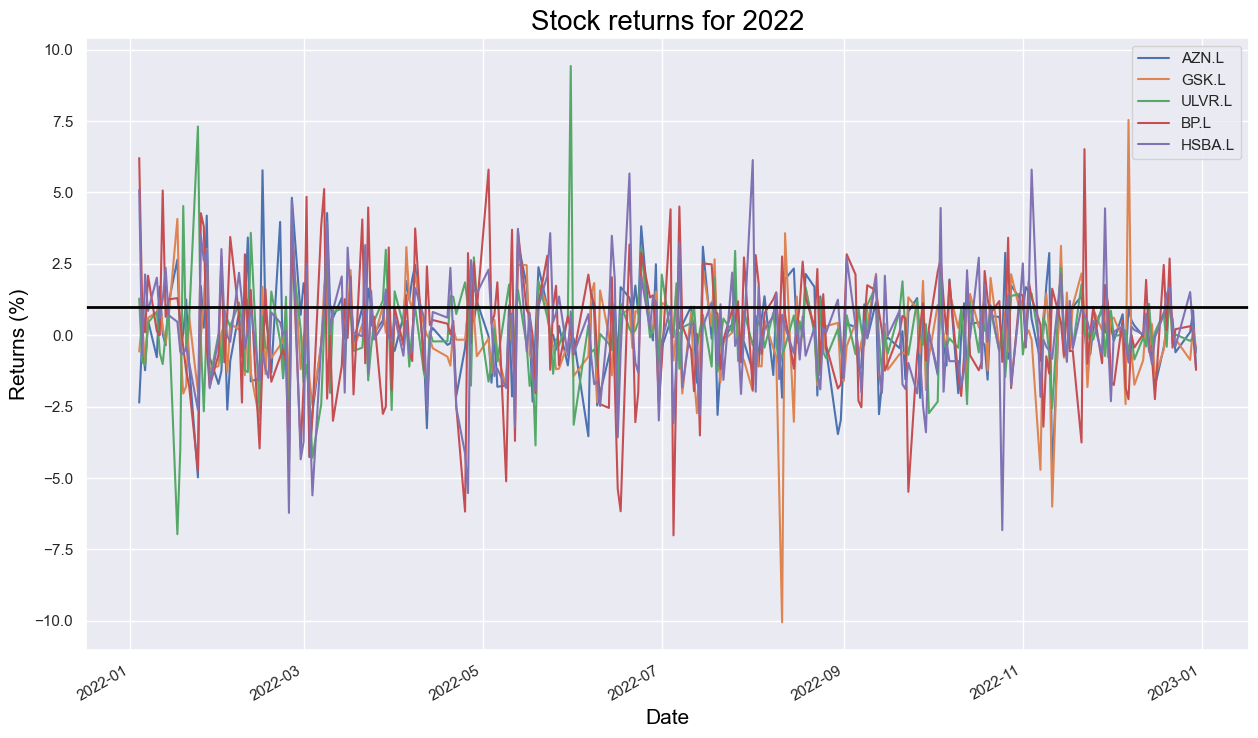

In [31]:
# Plot returns for 2019

returns.loc['2022-01-01':'2022-12-31'].plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Stock returns for 2022', color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15)

The above plot for 2019 shows changes between days, which is what more advanced methods consider when modelling stock behaviour.

### 5.3 Log differences

Another way to model the growth of a stock is with log differences. Taking the natural log of the prices will give an approximation to the true daily returns.

This can be represented with the formula $change_{t}$  = $log (price_{t}) - log (price_{t-1})$ 

Using logs, or summarising changes in terms of continuous compounding, has a number of advantages over looking at simple percent changes. For example, if your portfolio goes up by 50% (say from £100 to £150) and then declines by 50% (say from £150 to £75), you’re not back where you started. If you calculate your average percentage return (in this case, 0%), that’s not a particularly useful summary of the fact that you actually ended up 25% below where you started. 

By contrast, if your portfolio goes up in logarithmic terms by 0.5, and then falls in logarithmic terms by 0.5, you are exactly back where you started. The average log return on your portfolio is exactly the same number as the change in log price between the time you bought it and the time you sold it, divided by the number of years that you held it.


In [32]:
# Use numpy's log function to obtain and plot the log differences of the adjusted price data

stock_change = adj_close.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.

stock_change.head()

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
Date,,,,,
2013-10-10,NaN,NaN,NaN,NaN,NaN
2013-10-11,0.013789,0.005807,0.009727,0.005359,0.016522
2013-10-14,0.003143,0.008966,0.002942,0.008493,0.000290
2013-10-15,-0.001099,0.004135,0.008358,0.002815,-0.003485
2013-10-16,-0.007410,0.000000,-0.001666,0.002471,-0.002331


In [33]:
# Clean up the data by dropping NaNs

stock_change.dropna(inplace=True)
stock_change.head()

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
Date,,,,,
2013-10-11,0.013789,0.005807,0.009727,0.005359,0.016522
2013-10-14,0.003143,0.008966,0.002942,0.008493,0.000290
2013-10-15,-0.001099,0.004135,0.008358,0.002815,-0.003485
2013-10-16,-0.007410,0.000000,-0.001666,0.002471,-0.002331
2013-10-17,-0.003011,-0.000635,0.018585,-0.004159,-0.011439


Text(0, 0.5, 'Natural log')

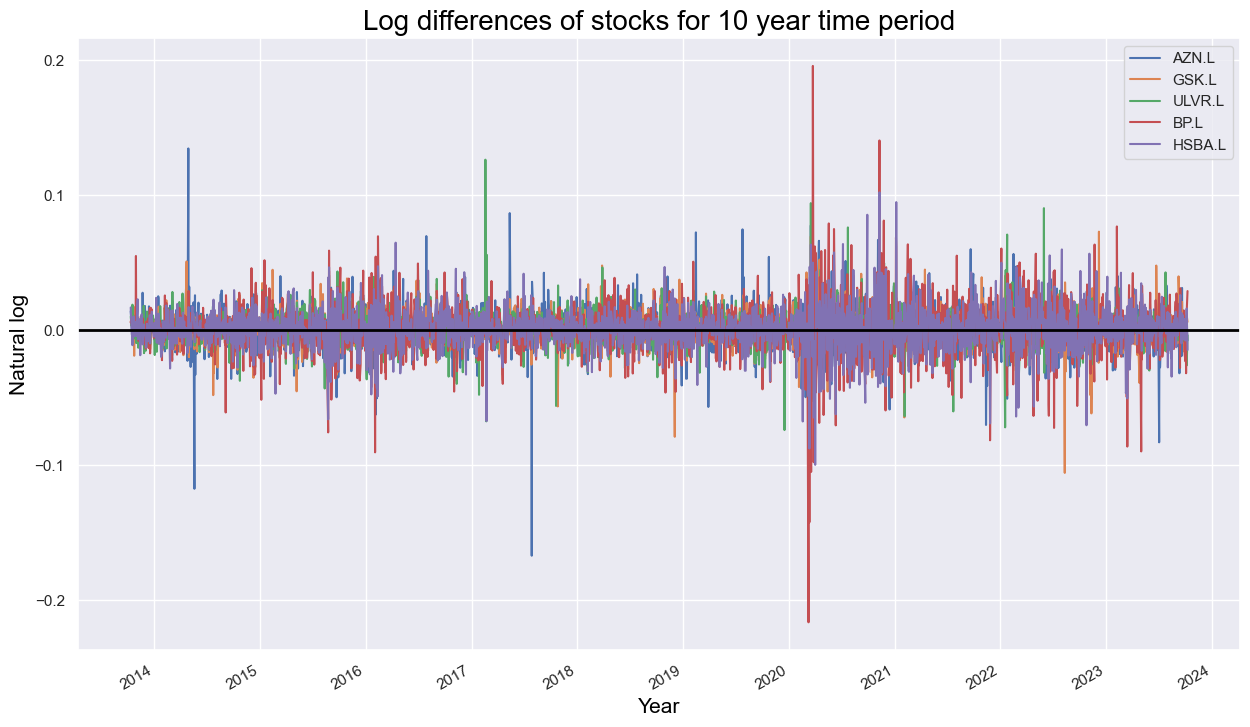

In [34]:
# Plot log differences for 2010-2019

stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log differences of stocks for 10 year time period', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15)

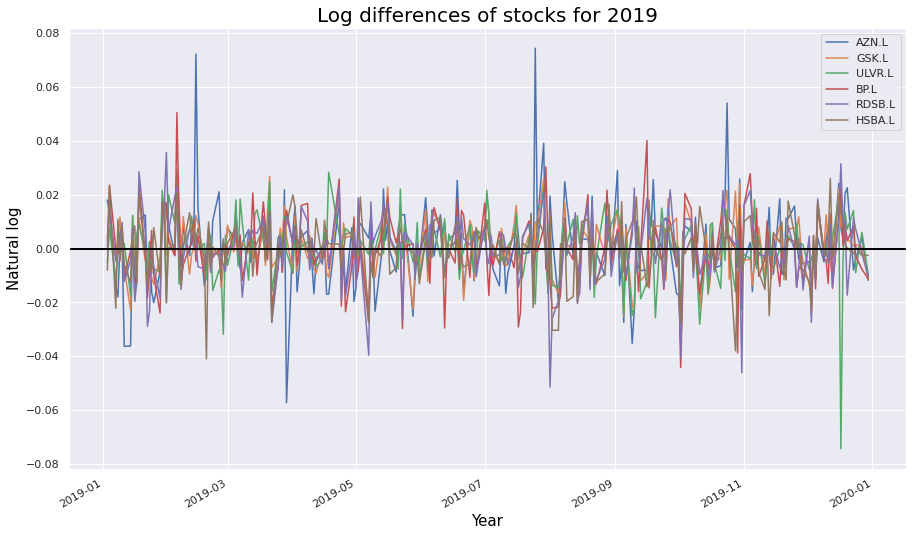

In [ ]:
# Plot log differences for 2019

stock_change.loc['2019-01-01':'2019-12-31'][1:].plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log differences of stocks for 2019', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15);

### 5.4 Annualise returns

We can annualise our returns, thus computing the annual percentage rate (APR). This helps us keep returns on a common time scale.

In [35]:
# annualise returns

stock_change_apr = stock_change * 252 * 100    # There are 252 trading days in a year; the 100 converts to percentages

stock_change_apr

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
Date,,,,,
2013-10-11,347.478003,146.324678,245.131565,135.051353,416.364623
2013-10-14,79.207754,225.931877,74.139051,214.035924,7.301713
2013-10-15,-27.694677,104.209129,210.615213,70.941645,-87.825226
2013-10-16,-186.740829,0.000000,-41.989629,62.267719,-58.732455
2013-10-17,-75.881805,-15.993087,468.329592,-104.810002,-288.252735
...,...,...,...,...,...
2023-10-03,-96.843380,20.368296,180.936653,-160.710478,211.799486
2023-10-04,-36.990832,27.134902,-256.188668,-811.731030,-184.243322
2023-10-05,23.125633,-64.490054,112.793922,-20.192642,156.888002


Text(0, 0.5, 'APR')

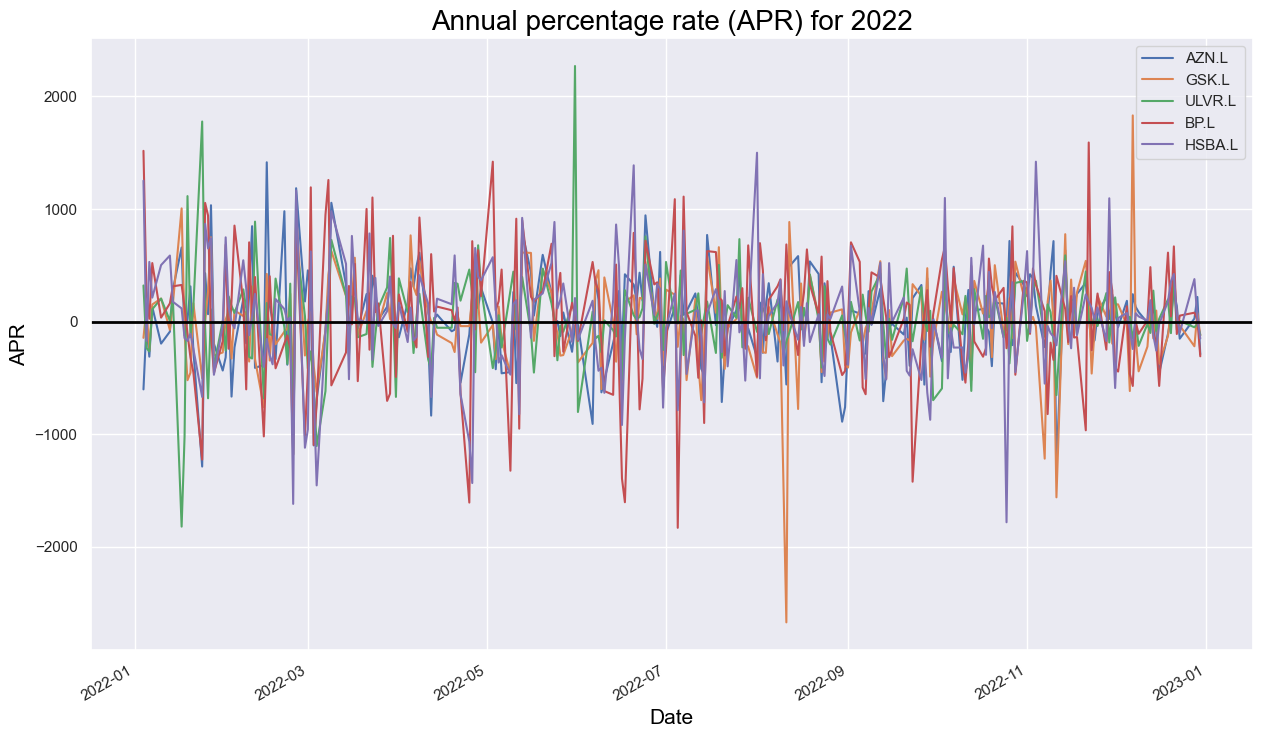

In [36]:
# Plot annualised returns for 2019

stock_change_apr['2022-01-01':'2022-12-31'].plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Annual percentage rate (APR) for 2022', color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('APR', color = 'black', fontsize = 15)

## 6. Calculating statistical data for returns

### 6.1 Calculate minimum and maximum returns for 2010-2019

In [37]:
# Date of worst single day returns

returns.idxmin()

AZN.L    2017-07-27
GSK.L    2022-08-11
ULVR.L   2019-12-17
BP.L     2020-03-09
HSBA.L   2020-04-01
dtype: datetime64[ns]

In [38]:
# Date of best single day returns

returns.idxmax()

AZN.L    2014-04-28
GSK.L    2022-12-07
ULVR.L   2017-02-17
BP.L     2020-03-24
HSBA.L   2020-11-09
dtype: datetime64[ns]

There may be some significance in the two pharmaceutical stocks' best day being within a few days of each other in the same month and year. Also, BP's largest drop and biggest gain were in consecutive months in the same year.

### 6.2 Mean

The mean is a statistical indicator that can be used to gauge the performance of a company’s stock price over a particular time period. Here it is the average of the returns, and also determines the standard deviation and variance.


In [39]:
# Compute mean to give a representation of the average expected returns 

returns.mean()

AZN.L     0.074812
GSK.L     0.031106
ULVR.L    0.041272
BP.L      0.048691
HSBA.L    0.031002
dtype: float64

### 6.3 Variance

The variance measures variability from the average or mean. It correlates to the size of the overall range of the data set, being greater when there is a wider range and narrower when there is a narrower range.  

It is calculated by taking the differences between each value in the data set and the mean, squaring the differences to make them positive, and dividing the sum of the squares by the number of values in the data set.

The calculation of variance uses squares because it weighs outliers more heavily than data closer to the mean. This calculation also prevents differences above the mean from cancelling out those below, which would result in a variance of zero.

This can be represented by the formula σ<sup>2</sup> = $\frac {\sum_{i = 1}^n (x_i - \overline{x})^2}{n}$




In [40]:
# Compute variance to give a measure of the dispersion of returns around the mean

returns.var()

AZN.L     2.342337
GSK.L     1.579610
ULVR.L    1.581708
BP.L      3.706744
HSBA.L    2.283254
dtype: float64

### 6.4 Standard deviation

Standard deviation (σ) is often used by investors to measure the risk of a stock or a stock portfolio, the basic idea being that it is a measure of volatility. It looks at how far from the mean a group of values is, and is calculated as the square root of variance by figuring out the variation between each data point relative to the mean. Essentially, it is the square root of the average squared deviation from the mean, and the more spread out the values are, the higher the standard deviation.
 


In [41]:
# Compute the standard deviation to describe dispersion, or variability, in the stock returns from the mean 
 
returns.std()

AZN.L     1.530470
GSK.L     1.256825
ULVR.L    1.257660
BP.L      1.925291
HSBA.L    1.511044
dtype: float64

However, in order for standard deviation to be an accurate measure of risk, an assumption has to be made that investment performance data follows a normal distribution and has a skewness of 0.

### 6.5 Skewness

Financial returns are typically positively or negatively skewed and warp the look of the normally distributed bell-shaped curve distorting the accuracy of standard deviation as a measure of risk. Skewness essentially measures the relative size of the two tails of the distribution.

In [42]:
# Compute skewness to measure the asymmetry of the data around its mean

returns.skew()

AZN.L    -0.107650
GSK.L    -0.257670
ULVR.L    0.668659
BP.L      0.188497
HSBA.L    0.101129
dtype: float64

Here the data looks fairly symmetrical as the skewness for all of the stock returns lies between -0.5 and 0.5 with ULVR.L being the most skewed. With a measure of 0.46 it is slightly positively skewed.

### 6.6 Kurtosis

Kurtosis is a measure of the combined sizes of the two tails - not the peakedness or flatness. It measures the tail-heaviness of the distribution, or amount of probability in the tails. 


In [43]:
# Compute kurtosis as a measure of the combined sizes of the two tails.

returns.kurt()

AZN.L     10.898600
GSK.L      5.256192
ULVR.L    11.031164
BP.L      14.575937
HSBA.L     5.267939
dtype: float64

A normal distribution has a kurtosis of 3, however the pandas kurtosis function makes it a uniform zero and in this case the measure is called excess kurtosis.

It appears that AZN.L has significant excess kurtosis followed by ULVR.L.


## 7. Data visualisation of returns

### 7.1 Pairplot 

Plot pairwise relationships of the stocks with the pairplot() function which uses scatterplot() for each pairing of the variables and histplot() for the marginal plots along the diagonal.

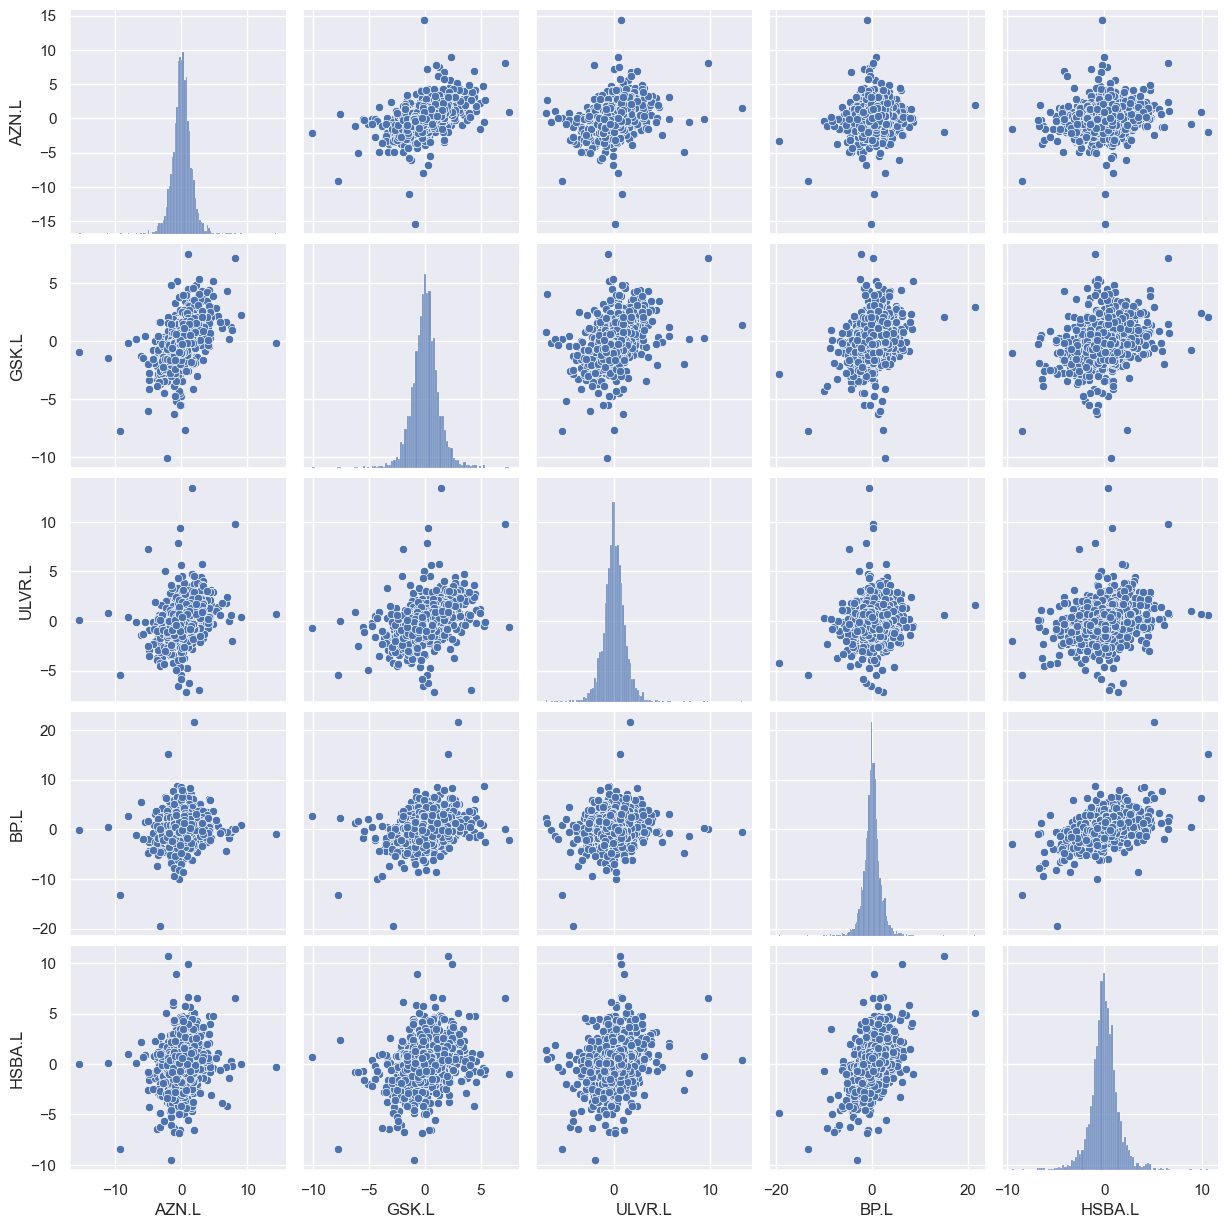

In [44]:
# Pairplot of returns dataframe 

sns.pairplot(returns);

### 7.2 Box plots

Box and whisker plots are a standardised way of displaying the distribution of data based on a five number summary (minimum, first quartile (Q1), median, third quartile (Q3), and maximum), with a line going through the box at the median. 



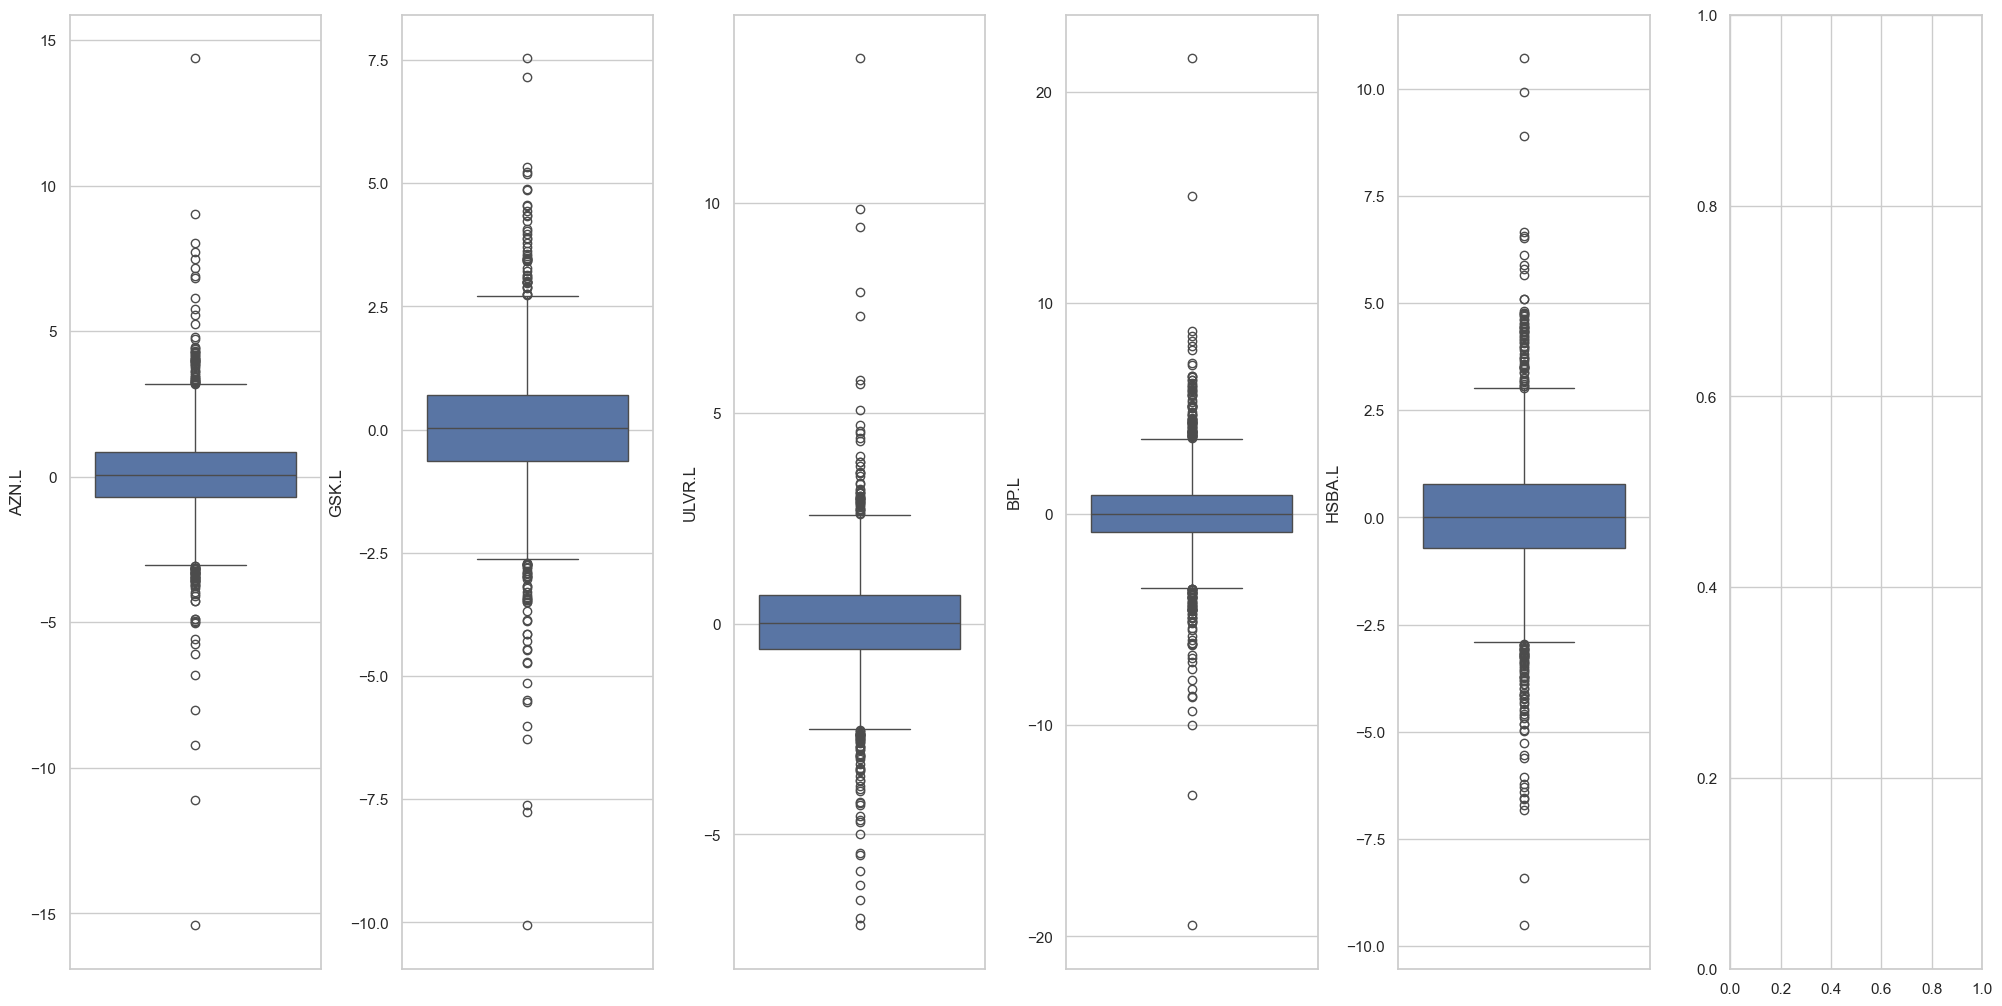

In [45]:
# Boxplots showing distribution of the returns data over the time period 

sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=6, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in returns.items():
    sns.boxplot(y=k, data=returns, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

By comparing the interquartile ranges (box lengths), we can compare dispersion. If two boxes do not overlap with one another then there is a difference between the two groups. We can see that AZN.L and ULVR. do not overlap with the other stocks.

If we compare the respective medians and the median line of one box lies outside of another entirely, then there is likely to be a difference between the two groups. Again we can see that AZN.L and ULVR. are different.

Whiskers show how big a range there is between maximum and minimum values, with larger ranges indicating wider distribution, that is, more scattered data.

We can look for signs of skewness suggesting that data may not be normally distributed. Skewed data show a lopsided box plot, where the median cuts the box into two unequal pieces. If the longer part of the box is above the median, the data is said to be positively skewed. If the longer part is or below the median, the data is negatively skewed.

Any values in the data set that are more extreme than the adjacent values are plotted as separate points on the box plot. This identifies them as potential outliers.


### 7.3 Distribution plots

Distribution plots depict the variation in the data distribution. Here the distribution of returns is shown by a histogram and a line in combination with it which is the kernel density estimate.

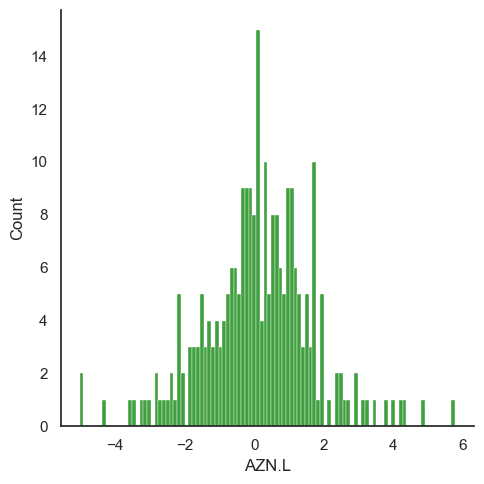

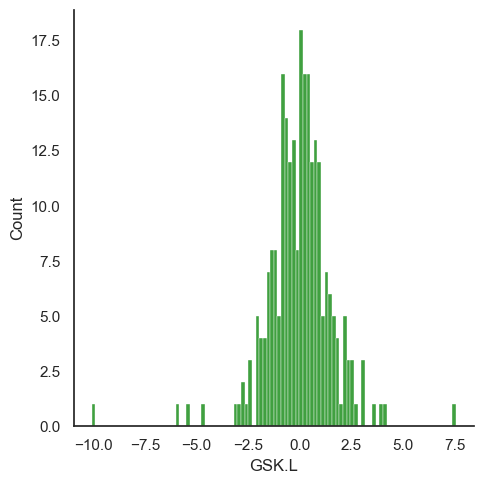

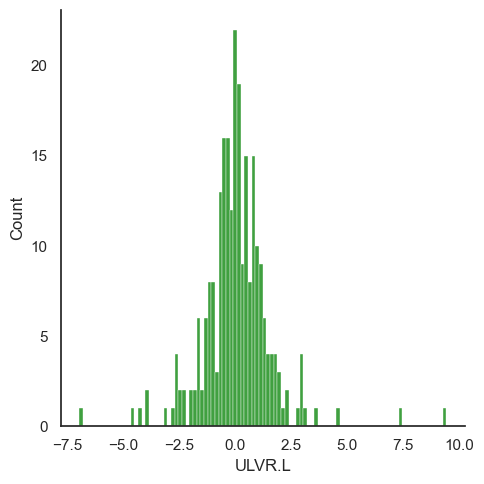

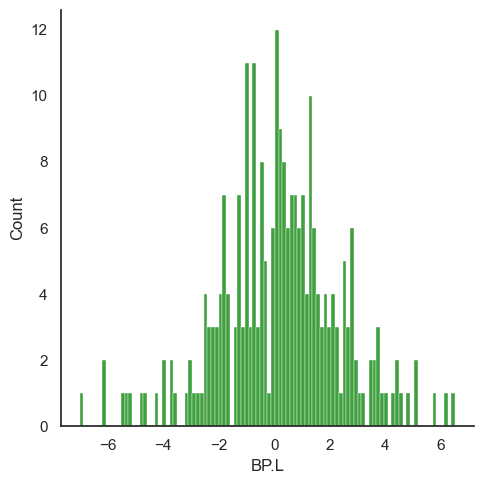

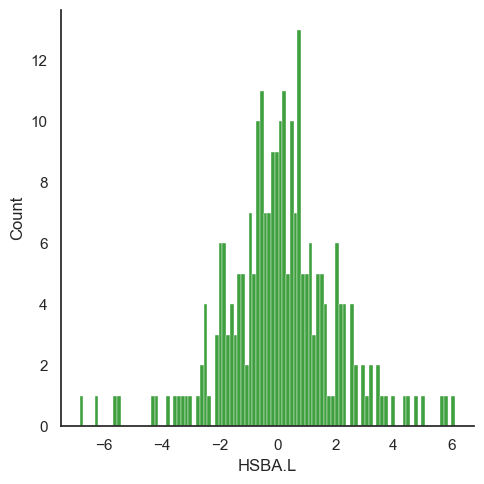

In [49]:
# Distribution plots showing the data for returns for 2019 

sns.set_style("white")

tickers = ['AZN.L', 'GSK.L', 'ULVR.L', 'BP.L', 'HSBA.L']
# fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
# axs = axs.flatten()

for ticker in tickers:
    sns.displot(returns.loc['2022-01-01':'2022-12-31'][ticker], color='green', bins=100)
    index += 1

### 7.4 Covariance

Covariance indicates the **direction** of the linear relationship between variables. It is a measure of the relationship between two stocks' returns and can help determine if stocks' returns tend to move with or against each other. 

Investors might even be able to select stocks that complement each other in terms of price movement. This can help reduce the overall risk and increase the overall potential return of a portfolio.

In [50]:
# Covariance matrix to show direction of relationship between stocks' returns

returns.cov() 

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
AZN.L,2.342337,1.063537,0.680997,0.561481,0.526062
GSK.L,1.063537,1.579610,0.693212,0.796140,0.629177
ULVR.L,0.680997,0.693212,1.581708,0.495085,0.532781
BP.L,0.561481,0.796140,0.495085,3.706744,1.454450
HSBA.L,0.526062,0.629177,0.532781,1.454450,2.283254


### 7.5 Correlation

Correlation measures both the **strength and direction** of the linear relationship between two variables, or the degree to which two variables move in relation to each other, and is a function of the covariance.

In [51]:
# Correlation matrix to show strength and direction of relationship between stocks' returns

returns.corr()

,AZN.L,GSK.L,ULVR.L,BP.L,HSBA.L
AZN.L,1.000000,0.552908,0.353800,0.190552,0.227476
GSK.L,0.552908,1.000000,0.438559,0.329017,0.331300
ULVR.L,0.353800,0.438559,1.000000,0.204466,0.280355
BP.L,0.190552,0.329017,0.204466,1.000000,0.499949
HSBA.L,0.227476,0.331300,0.280355,0.499949,1.000000


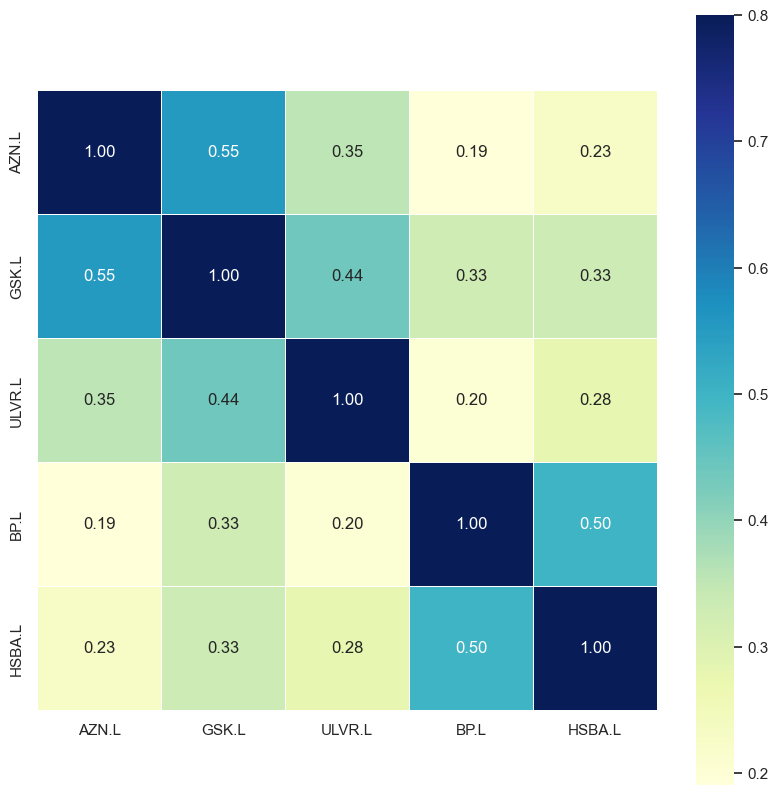

In [52]:
# The heatmap clearly shows the strength of correlation between pairs of company returns

plt.figure(figsize=(10, 10))
sns.heatmap(data = returns.corr(), vmax=.8, linewidths=0.5,  fmt='.2f',
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.show()

The strongest correlation is between RDSB and BP (oil stocks) followed by GSK and AZN (pharmaceutical stocks).

## 8. FTSE 100 Index data

Finally, we will visualise data from the launch of the FTSE 100 Index in January 1984 to the end of 2020 as being representative of the UK stock market.  


In [53]:
# Download FTSE 100 historical stock data from Yahoo! Finance for 1984-2020

ftse100_idx_to_2023 = yf.download("^FTSE", start=datetime.datetime(1984, 1, 1), 
                                     end=datetime.datetime(2023, 1, 1))
ftse100_idx_to_2023

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1984-01-03,997.500000,1001.400024,997.500000,997.500000,997.500000,0
1984-01-04,997.500000,999.500000,993.299988,998.599976,998.599976,0
1984-01-05,1007.099976,1015.799988,1007.099976,1015.799988,1015.799988,0
1984-01-06,1019.000000,1029.300049,1019.000000,1029.000000,1029.000000,0
1984-01-09,1030.599976,1035.400024,1030.599976,1034.599976,1034.599976,0
...,...,...,...,...,...,...
2022-12-22,7497.299805,7540.299805,7463.500000,7469.299805,7469.299805,402305900
2022-12-23,7469.299805,7496.399902,7462.799805,7473.000000,7473.000000,222853700
2022-12-28,7473.000000,7547.000000,7473.000000,7497.200195,7497.200195,416900400


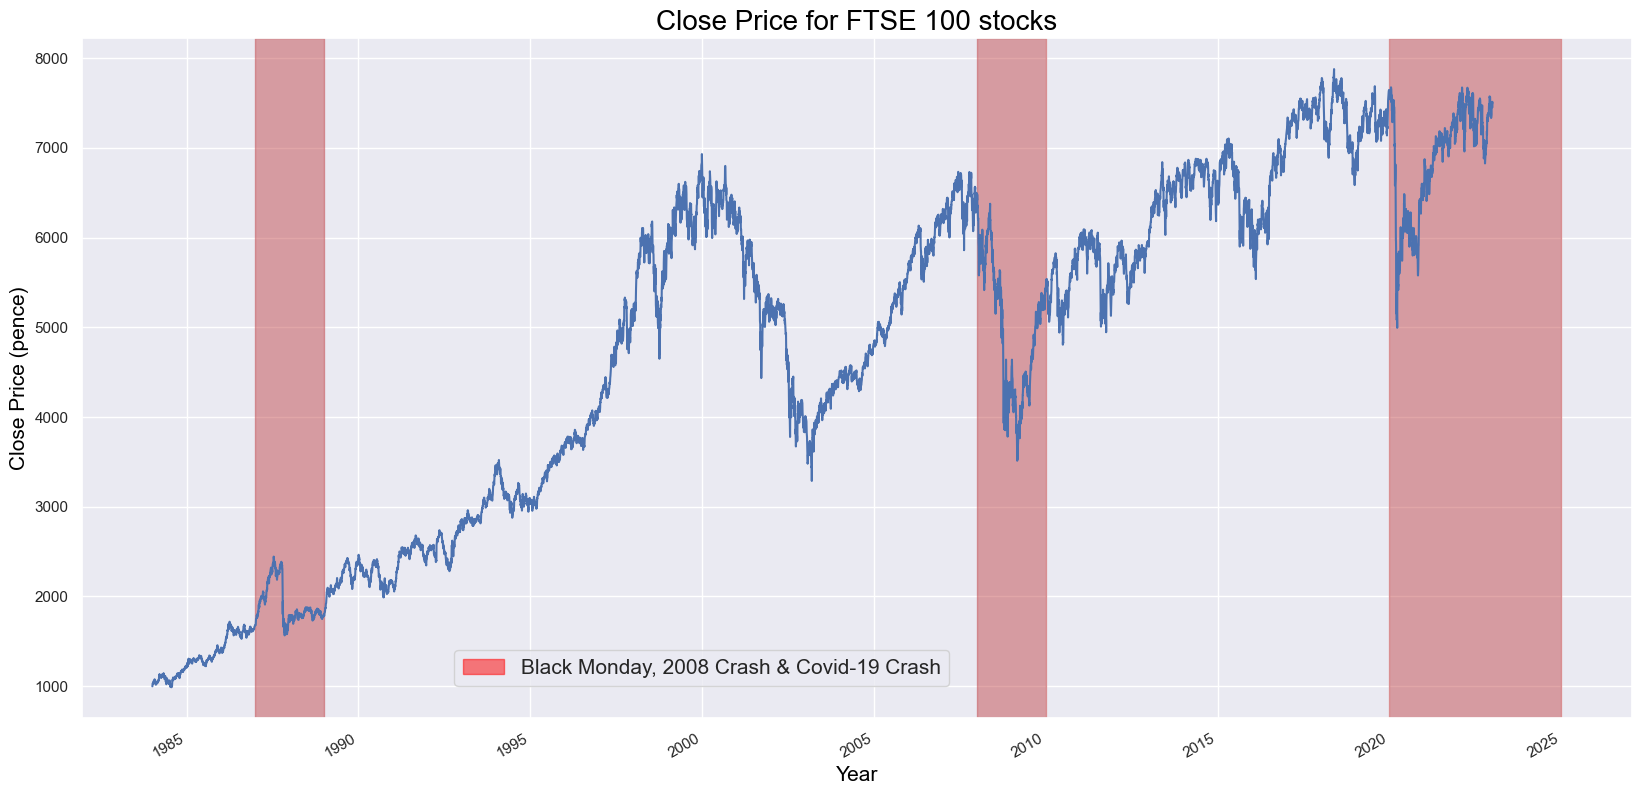

In [55]:
def ftse100_to_2023_plot():
    ftse100_idx_to_2023['Close'].plot(grid = True)
    sns.set(rc={'figure.figsize':(20, 10)})
    plt.axvspan('1987','1989',color='r',alpha=.5)
    plt.axvspan('2008','2010',color='r',alpha=.5)
    plt.axvspan('2020','2025',color='r',alpha=.5)
    labs = mpatches.Patch(color='red',alpha=.5, label="Black Monday, 2008 Crash & Covid-19 Crash")
    plt.legend(handles=[labs], prop={"size":15},  bbox_to_anchor=(0.4, 0.1), loc='upper center', borderaxespad=0.)
    plt.title('Close Price for FTSE 100 stocks', color = 'black', fontsize = 20)
    plt.xlabel('Year', color = 'black', fontsize = 15)
    plt.ylabel('Close Price (pence)', color = 'black', fontsize = 15)
    plt.show()

ftse100_to_2023_plot()

The plot clearly shows the major market events of Black Monday in 1987, the 2008 Global Financial Crisis, and the Coronavirus Crash in 2020 and appears to confirm the overall upward trend of stocks from 2010-2019 evident in the selection of stocks analysed.